# HR Analytics: Employee Attrition Analysis
This work aims to analyze the factors influencing employee attrition using the HR dataset.

##Introduction

Employee attrition can be costly and distruptive to companies.
Understanding why employees leave is crucial for any organization, as maintaining hihgly qualified personnel is important for a company's growth and well-being.

My analysis focuses primarily on key variables like gender, education, and marital status to discover patterns related to employee turnover

In [1]:
# Importing libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Quick look at data
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## Data Cleaning & Prep
* We are checking for missing values
* Mapping numerical education levels to descriptive labels for readability

In [19]:
#Checking for missing values
print(df.isnull().sum())

# Mapping education levels to names
edu_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
df['EducationLevel'] = df['Education'].map(edu_map)

# Display sample data with mapped education
df[['Education', 'EducationLevel']].head()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Education EducationLevel
0          2        College
1          1  Below College
2          2        College
3          4         Master
4          1  Below College

## Exploratory Data Analysis
### Attrition Distribution

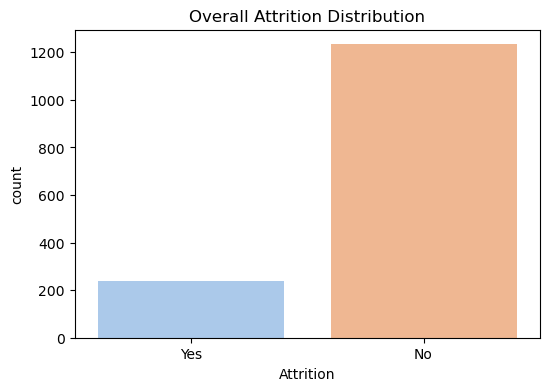

In [21]:
# Attrition count plot
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, hue='Attrition', palette='pastel', legend=False)
plt.title('Overall Attrition Distribution')
plt.show()

### Attrition by Gender

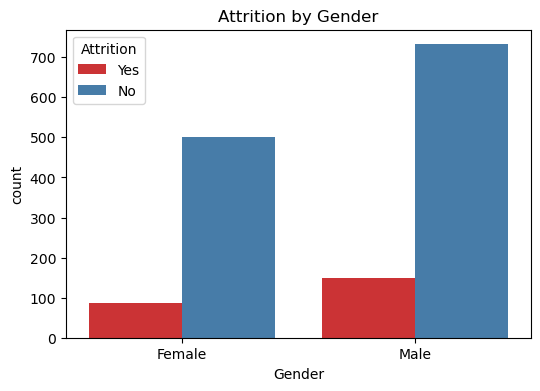

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Attrition', palette='Set1')
plt.title('Attrition by Gender')
plt.show()

### Attrition by Education Level

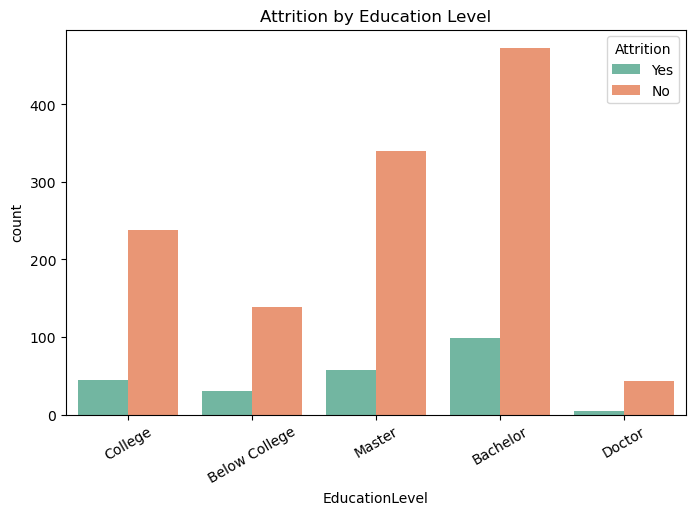

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='EducationLevel', hue='Attrition', palette='Set2')
plt.title('Attrition by Education Level')
plt.xticks(rotation=30)
plt.show()

### Attrition by Marital Status

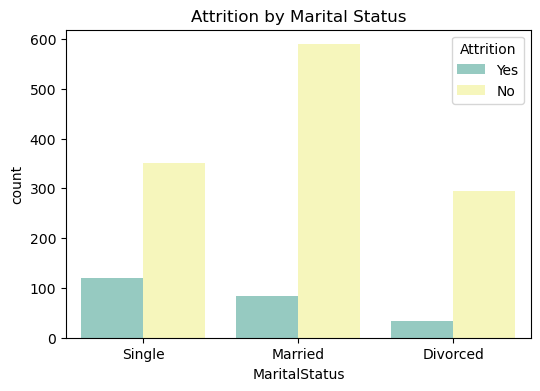

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='Set3')
plt.title('Attrition by Marital Status')
plt.show()

## Key insights
- Employees with a Doctorate degree have the lowest attrition rate.
- Those with a Bachelor’s degree have the highest number of leavers.
- Single employees are the most likely to leave, while married employees tend to stay longer.

### Attrition by overtime

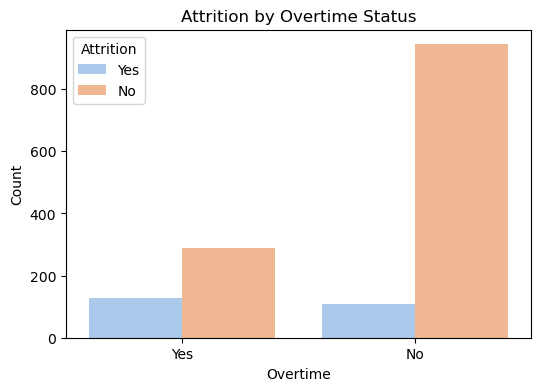

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='pastel')
plt.title('Attrition by Overtime Status')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.show()

### Monthly income and attrition

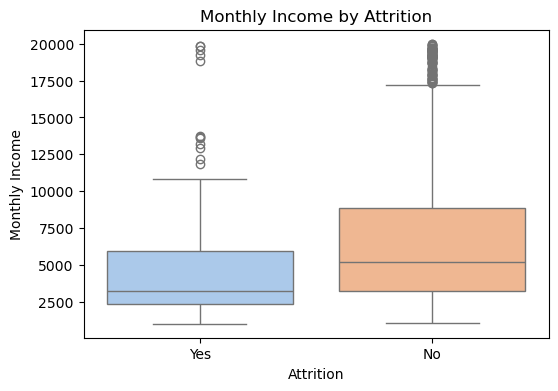

In [2]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', hue='Attrition', palette='pastel', legend=False)
plt.title('Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

### Job satisfaction and attrition

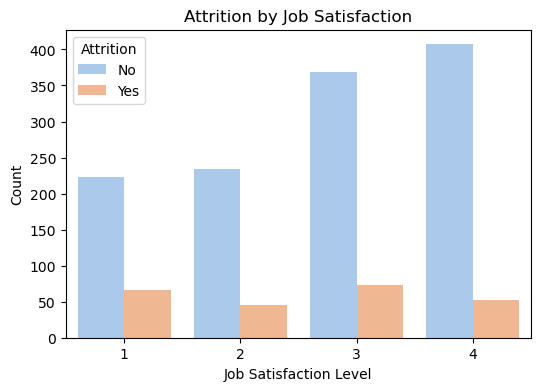

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='pastel')
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.show()

### Data cleaning

In [28]:
# Checking for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Dropping duplicates if any
df = df.drop_duplicates()

# Standardize column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")

Number of duplicate rows: 0
